# Recommender systems

LINK:https://www.analyticssteps.com/blogs/what-are-recommendation-systems-machine-learning

Recommender systems are the systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the users are most likely to purchase and are of interest to. Companies like Netflix, Amazon, etc. use recommender systems to help their users to identify the correct product or movies for them. 

## Why the Recommendation system?
 

. Benefits users in finding items of their interest.

. Help item providers in delivering their items to the right user.

. Identity products that are most relevant to users.

. Personalized content.

. Help websites to improve user engagement.

## What can be Recommended?
 

There are many different things that can be recommended by the system like movies, books, news, articles, jobs, advertisements, etc. Netflix uses a recommender system to recommend movies & web-series to its users. Similarly, YouTube recommends different videos. There are many examples of recommender systems that are widely used today.

1. Home page recommendation

2. Related item recommendation


1. Home page recommendation:

Homepage recommendations are personalized to a user based on their known interests. Every user sees different recommendations.If you go to the Google Play Apps homepage, you may see something like this

2. Related Item Recommendations

As the name suggests, related items are recommendations similar to a particular item. In the Google Play apps example, users looking at a page for a math app may also see a panel of related apps, such as other math or science apps.

40% of app installs on Google Play come from recommendations.
60% of watch time on YouTube comes from recommendations.

## Terminology

#### 1.Items (also known as documents)

The entities a system recommends. For the Google Play store, the items are apps to install. For YouTube, the items are videos.

#### 2.Query or Attribute (also known as context)

The information a system uses to make recommendations. Queries can be a combination of the following:

. user information

. the id of the user

. items that users previously interacted with

. additional context

. time of day

. the user's device

### Embedding

A mapping from a discrete set (in this case, the set of queries, or the set of items to recommend) to a vector space called the embedding space. Many recommendation systems rely on learning an appropriate embedding representation of the queries and items.

### Types

1. Popularity-Based Recommendation System

2. Classification Model

3. Content-Based Recommendation System

  a. Cosine Similarity
  
  b. Jaccard Similarity

4. Collaborative Filtering
  
  a. User-based nearest-neighbor collaborative filtering
  
  b. Item-based nearest-neighbor collaborative filtering
  
  c. Singular value decomposition and matrix-factorization
  
5. Hybrid Recommendation Systems

6. Demographic Filtering

## Recommendation Systems Overview

One common architecture for recommendation systems consists of the following components:

. candidate generation

. scoring

. re-ranking

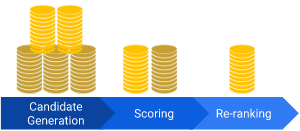

#### Candidate generation:

In this first stage, the system starts from a potentially huge corpus and generates a much smaller subset of candidates. For example, the candidate generator in YouTube reduces billions of videos down to hundreds or thousands. The model needs to evaluate queries quickly given the enormous size of the corpus. A given model may provide multiple candidate generators, each nominating a different subset of candidates.

#### Scoring

Next, another model scores and ranks the candidates in order to select the set of items (on the order of 10) to display to the user. Since this model evaluates a relatively small subset of items, the system can use a more precise model relying on additional queries.

#### Re-ranking

Finally, the system must take into account additional constraints for the final ranking. For example, the system removes items that the user explicitly disliked or boosts the score of fresher content. Re-ranking can also help ensure diversity, freshness, and fairness.

#### Candidate Generation Overview

Candidate generation is the first stage of recommendation. Given a query, the system generates a set of relevant candidates. The following table shows two common candidate generation approaches:

content-based filtering:  Uses similarity between items to recommend items similar to what the user likes.	If user A watches two cute cat videos, then the system can recommend cute animal videos to that user.

collaborative filtering:  Uses similarities between queries and items simultaneously to provide recommendations.	If user A is similar to user B, and user B likes video 1, then the system can recommend video 1 to user A (even if user A hasn’t seen any videos similar to video 1).

#### Embedding Space

Both content-based and collaborative filtering map each item and each query (or context) to an embedding vector in a common embedding space . Typically, the embedding space is low-dimensional (that is,  is much smaller than the size of the corpus), and captures some latent structure of the item or query set. Similar items, such as YouTube videos that are usually watched by the same user, end up close together in the embedding space. The notion of "closeness" is defined by a similarity measure.

## Similarity Measures

A similarity measure is a function  that takes a pair of embeddings and returns a scalar measuring their similarity. The embeddings can be used for candidate generation as follows: given a query embedding , the system looks for item embeddings  that are close to , that is, embeddings with high similarity .

To determine the degree of similarity, most recommendation systems rely on one or more of the following:

. cosine

. dot product

. Euclidean distance

#### cosine:

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis. 

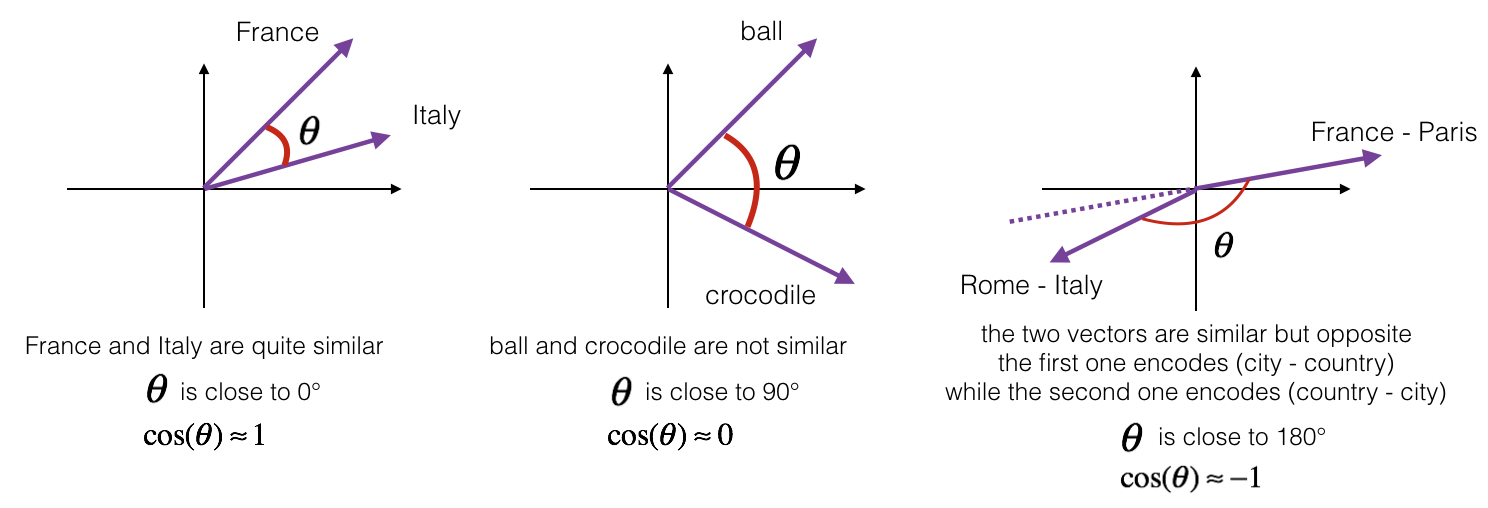

#### Dot product:

In mathematics, the dot product or scalar product is an algebraic operation that takes two equal-length sequences of numbers (usually coordinate vectors), and returns a single number. ... Algebraically, the dot product is the sum of the products of the corresponding entries of the two sequences of numbers.

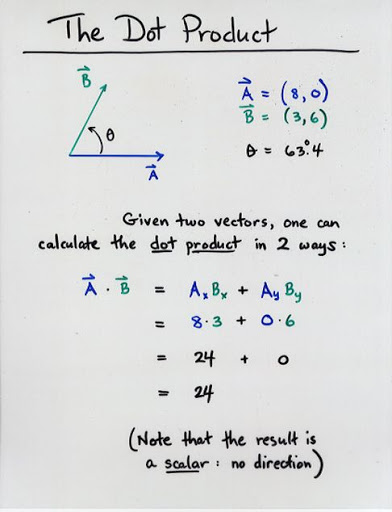

#### Euclidean distance:

In mathematics, the Euclidean distance between two points in Euclidean space is the length of a line segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem, therefore occasionally being called the Pythagorean distance.

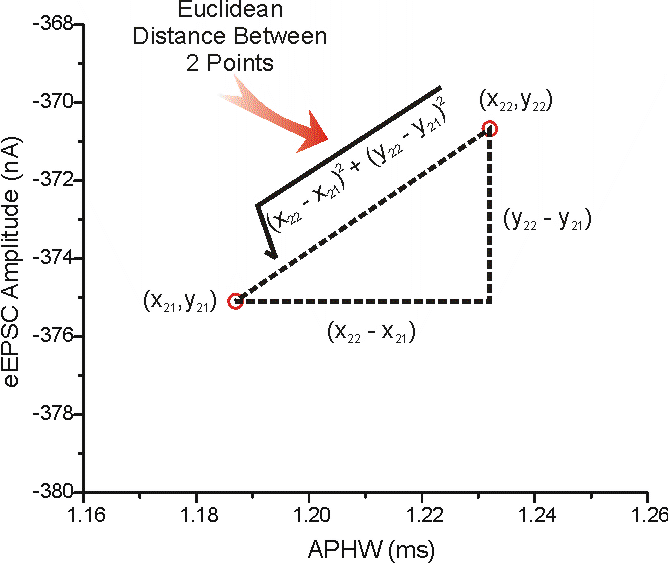

### Comparing Similarity Measures

Consider the example in the figure to the right. The black vector illustrates the query embedding. The other three embedding vectors (Item A, Item B, Item C) represent candidate items. Depending on the similarity measure used, the ranking of the items can be different.
Using the image, try to determine the item ranking using all three of the similarity measures: cosine, dot product, and Euclidean distance.
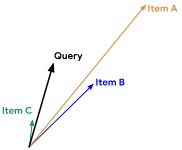

#### How did you do?

Item A has the largest norm, and is ranked higher according to the dot-product. Item C has the smallest angle with the query, and is thus ranked first according to the cosine similarity. Item B is physically closest to the query so Euclidean distance favors it.
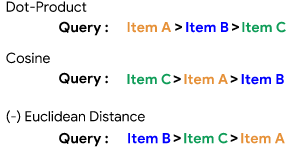

#### Which Similarity Measure to Choose?

Compared to the cosine, the dot product similarity is sensitive to the norm of the embedding. That is, the larger the norm of an embedding, the higher the similarity (for items with an acute angle) and the more likely the item is to be recommended. This can affect recommendations as follows:

Items that appear very frequently in the training set (for example, popular YouTube videos) tend to have embeddings with large norms. If capturing popularity information is desirable, then you should prefer dot product. However, if you're not careful, the popular items may end up dominating the recommendations. In practice, you can use other variants of similarity measures that put less emphasis on the norm of the item. For example, define  for some .

Items that appear very rarely may not be updated frequently during training. Consequently, if they are initialized with a large norm, the system may recommend rare items over more relevant items. To avoid this problem, be careful about embedding initialization, and use appropriate regularization. We will detail this problem in the first exercise.

#### cosine vs dot product:

Cosine similarity only cares about angle difference, while dot product cares about angle and magnitude. ... Sometimes it is desirable to ignore the magnitude, hence cosine similarity is nice, but if magnitude plays a role, dot product would be better as a similarity measure.



## Content-based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.

To demonstrate content-based filtering, let’s hand-engineer some features for the Google Play store. The following figure shows a feature matrix where each row represents an app and each column represents a feature. Features could include categories (such as Education, Casual, Health), the publisher of the app, and many others. To simplify, assume this feature matrix is binary: a non-zero value means the app has that feature.

You also represent the user in the same feature space. Some of the user-related features could be explicitly provided by the user. For example, a user selects "Entertainment apps" in their profile. Other features can be implicit, based on the apps they have previously installed. For example, the user installed another app published by Science R Us.

The model should recommend items relevant to this user. To do so, you must first pick a similarity metric (for example, dot product). Then, you must set up the system to score each candidate item according to this similarity metric. Note that the recommendations are specific to this user, as the model did not use any information about other users.

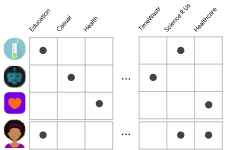

### Content-based Filtering Advantages & Disadvantages

#### Advantages

. The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users.

. The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

#### Disadvantages

. Since the feature representation of the items are hand-engineered to some extent, this technique requires a lot of domain knowledge. Therefore, the model can only be as good as the hand-engineered features.

. The model can only make recommendations based on existing interests of the user. In other words, the model has limited ability to expand on the users' existing interests.

# Building Basic Recommendation System

### Demographic Filtering-

They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

we need a metric to score or rate movie
Calculate the score for every movie
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,

v is the number of votes for the movie;

m is the minimum votes required to be listed in the chart;

R is the average rating of the movie; And

C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

### Weighted average values

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
credit = pd.read_csv('tmdb credits.csv')
movie = pd.read_csv('tmdb movie.csv')

In [18]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
print('credit:',credit.shape)
print('movie:', movie.shape)

credit: (4803, 4)
movie: (4803, 20)


In [25]:
# renaming movie_id column name in the credit data frame

credit_rename = credit.rename(columns = {'movie_id': 'id'})

In [26]:
credit_rename.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
movie_merge= movie.merge(credit_rename, on='id')

In [28]:
movie_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [29]:
movie_cleaned = movie_merge.drop(columns = ['homepage','production_companies', 'title_x', 'title_y'])

In [31]:
movie_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [32]:
movie_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_countries  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  vote_average         

### Weighted average for each movie avg rating

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

R = average for the movie (mean) = (Rating)

v = number of votes for the movie = (votes)

m = minimum votes required to be listed in the Top 250 (currently 3000)

C = the mean vote across the whole report (currently 6.9)


In [33]:
v = movie_cleaned['vote_count']
r = movie_cleaned['vote_average']
c = movie_cleaned['vote_average'].mean()
m = movie_cleaned['vote_count'].quantile(0.70)

In [31]:
movie_cleaned['weighted_average'] = ((r*v)+(c*m))/(v+m)

In [32]:
movie_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276075
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509565
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098319


In [41]:
movie_sorted = movie_cleaned.sort_values('weighted_average', ascending = False)

In [44]:
movie_sorted[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


# Recommender systems with python

1. Content based filtering

ex: Netflix

2. collaborative filtering

ex: Amazon(after buying phone it show back cover)

## Recommender system using Correlation

## Building a movie Content Based Recommendation System

In [34]:
import pandas as pd
import numpy as np

In [35]:
credit = pd.read_csv('tmdb credits.csv')
movie= pd.read_csv('tmdb movie.csv')

In [36]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [37]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [38]:
credit_rename = credit.rename(columns = {'movie_id': 'id'})

In [39]:
credit_rename.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [40]:
movie_merge = movie.merge(credit_rename, on = 'id')
movie_merge.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [41]:
movie_cleaned = movie_merge.drop(columns = ['homepage','title_x', 'title_y', 'status', 'production_countries'])

In [42]:
movie_cleaned.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### content based recommendation system

lets make a recommendation based on movie's plot summaries given in the overview column. so if user gives us a movie title. our goal is to recommend movies that shares similar summaries

In [43]:
movie_cleaned.head(1)['overview']

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

#### TfidfVectorizer -(tf: term frequency, idf: inverse document frequency)

Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index. ... In each vector the numbers (weights) represent features tf-idf score.
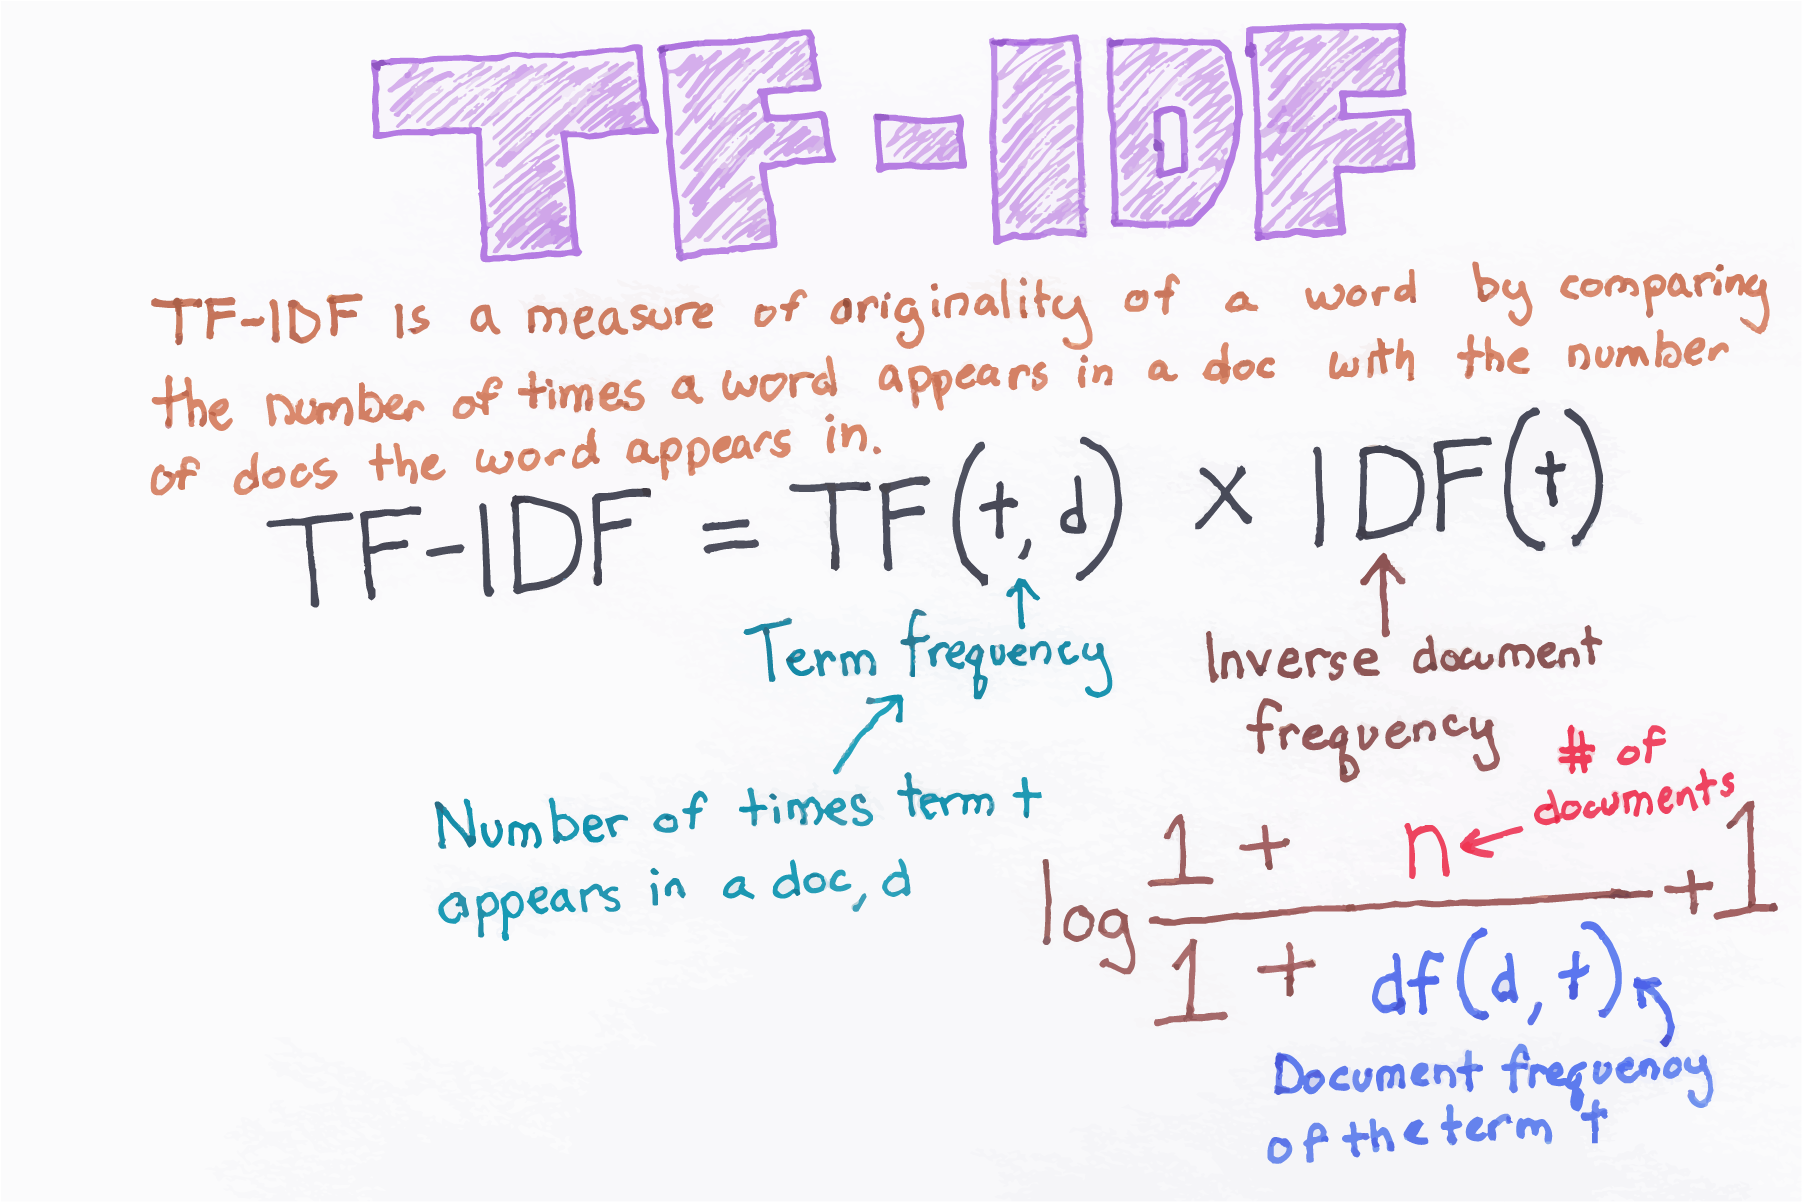

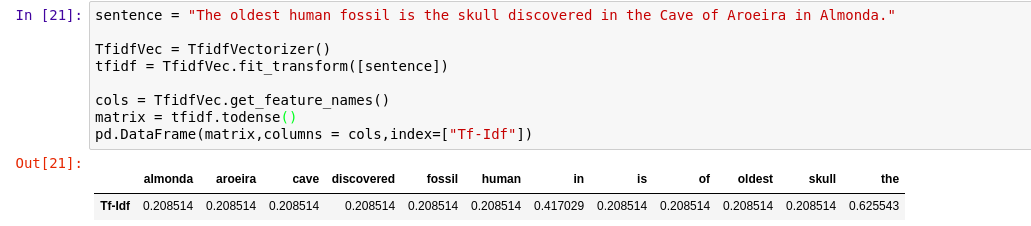

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df = 3, max_features = None,strip_accents='unicode',analyzer='word',
     token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(1, 3),stop_words= 'english')

# filling nan with empty string
movie_cleaned['overview'] = movie_cleaned['overview'].fillna('')
 

In [50]:
# fitting the tfv on overview column

tfv_matrix = tfv.fit_transform(movie_cleaned['overview'])

In [51]:
print(tfv_matrix)

  (0, 140)	0.3091311403250014
  (0, 1613)	0.2781519888709605
  (0, 405)	0.2108476222845202
  (0, 6877)	0.26867652924731417
  (0, 6280)	0.25667782792456906
  (0, 3494)	0.21788257757629861
  (0, 8926)	0.24144219475319859
  (0, 5756)	0.17992707015426695
  (0, 9240)	0.24435395917916744
  (0, 6375)	0.2959108637414298
  (0, 5819)	0.2747332388389473
  (0, 2557)	0.2818968058308858
  (0, 5514)	0.2610479764815685
  (0, 1463)	0.20118856027389756
  (0, 139)	0.3091311403250014
  (1, 1752)	0.36793229072333994
  (1, 6978)	0.3031029042939378
  (1, 2832)	0.30082125582474917
  (1, 9140)	0.3355175975086389
  (1, 2765)	0.21556897928560054
  (1, 2788)	0.3232482593626707
  (1, 4098)	0.30803003793564465
  (1, 5126)	0.1333016217342793
  (1, 1748)	0.2104623271234315
  (1, 2247)	0.21892404835497967
  :	:
  (4802, 4762)	0.15255446669169387
  (4802, 7615)	0.1727540634388687
  (4802, 2217)	0.14349928685024785
  (4802, 638)	0.17000356994511903
  (4802, 2290)	0.15968580131488627
  (4802, 644)	0.14349928685024785
  (

In [52]:
tfv_matrix.shape

(4803, 9920)

We see that over 9900 words used to describe 4800 movies in our data set. with this matrix in hand we can compute similarity score. there are different ways to calculate similarity scores like euclidean distance, cosine, pearson correlation. there is no right answer to which score is best different scores works well in different scenarios

In [53]:
from sklearn.metrics.pairwise import sigmoid_kernel
# compute the sigmoid kernel
sig= sigmoid_kernel(tfv_matrix, tfv_matrix)

In [54]:
sig[0]

array([0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [55]:
# revers mapping of indices and movie title
indices = pd.Series(movie_cleaned.index, index =movie_cleaned['original_title']).drop_duplicates()

In [56]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [57]:
indices['Spectre']

2

In [58]:
sig[2]

array([0.76159416, 0.76159416, 0.76163649, ..., 0.76159484, 0.76159416,
       0.76159416])

In [59]:
list(enumerate(sig[indices['Spectre']]))

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7616364888287208),
 (3, 0.7615941559557649),
 (4, 0.7615941559557649),
 (5, 0.7615941559557649),
 (6, 0.7615941559557649),
 (7, 0.7615956640286787),
 (8, 0.761595135816963),
 (9, 0.7615941559557649),
 (10, 0.7615941559557649),
 (11, 0.7616022533114793),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615941559557649),
 (17, 0.7615964736575724),
 (18, 0.7615956457865829),
 (19, 0.7615941559557649),
 (20, 0.7615941559557649),
 (21, 0.7615941559557649),
 (22, 0.7615941559557649),
 (23, 0.7615951400619011),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615941559557649),
 (28, 0.7615941559557649),
 (29, 0.7616004945820594),
 (30, 0.7615941559557649),
 (31, 0.7615941559557649),
 (32, 0.7615941559557649),
 (33, 0.7615941559557649),
 (34, 0.7615941559557649),
 (35, 0.7615973935075602),
 (36, 0.761594989596966),
 (37, 0.76159

In [60]:
sorted(list(enumerate(sig[indices['Spectre']])), key = lambda x: x[1], reverse = True)

[(2, 0.7616364888287208),
 (1343, 0.7616052377701891),
 (3162, 0.7616044035605247),
 (4071, 0.7616040741038707),
 (11, 0.7616022533114793),
 (3351, 0.7616015058618981),
 (1717, 0.7616008496639727),
 (1200, 0.7616008223919528),
 (4339, 0.7616007236652255),
 (1281, 0.7616005252082026),
 (29, 0.7616004945820594),
 (3285, 0.7616001606018372),
 (1880, 0.7615998109298194),
 (1837, 0.761599766952784),
 (3336, 0.7615996794953853),
 (4402, 0.7615995770119026),
 (1131, 0.7615994416537751),
 (367, 0.7615992375123227),
 (1743, 0.7615991395036813),
 (277, 0.7615990726224816),
 (147, 0.7615989822980356),
 (1223, 0.7615988502245521),
 (2080, 0.7615987832656909),
 (1642, 0.7615986885145458),
 (1967, 0.7615986731612812),
 (3610, 0.76159855866395),
 (698, 0.7615984991378032),
 (170, 0.7615984866342543),
 (3251, 0.7615984403989641),
 (4009, 0.7615984308506866),
 (218, 0.761598380486726),
 (3310, 0.7615983476198617),
 (3969, 0.7615983001465073),
 (3143, 0.7615982712041465),
 (695, 0.7615982483338191),
 (2

In [61]:
def give_rec(title, sig=sig):
    # get the index corresponding to original_title
    idx = indices[title]
    
    # get pair wise similarity scores
    sig_scores = list(enumerate(sig[idx])
    
    # sort the movies
    #sig_scores = sorted(sig_scores, key=lambda x:x[1], reverse = True)
    
     sig_scores = sorted(list(enumerate(sig[indices[title]])), key = lambda x: x[1], reverse = True)                 
    
    # scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]
                      
    # movie indices
    movie_indices = [i[0] for i in sig_scores]
                      
     # top 10 most similar movies
    return movie_cleaned['original_ttle'].iloc[movie_indices]
    
    

SyntaxError: invalid syntax (<ipython-input-61-f7be426f01d6>, line 11)

### Credits, Genres and Keywords Based Recommender

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

## Recommendation system using machine learning

### collaborative filtering method-Matrix Factorization-based Algorithm

1. Matrix factorization is a class of collaborative filtering algorithms used in recommender systems. This family of methods became widely known during the Netflix prize challenge due to how effective it was.

2. Matrix factorization algorithms work by decomposing the user-movie interaction matrix into the product of two lower dimensionality rectangular matrices, say U and M. The decomposition is done in such a way that the product results in almost similar values to the user-movie interaction matrix. Here, U represents the user matrix, M represents the movie matrix, n is the number of users, and m is the number of movies.

3. Each row of the user matrix represents a user and each column of the movie matrix represents a movie.

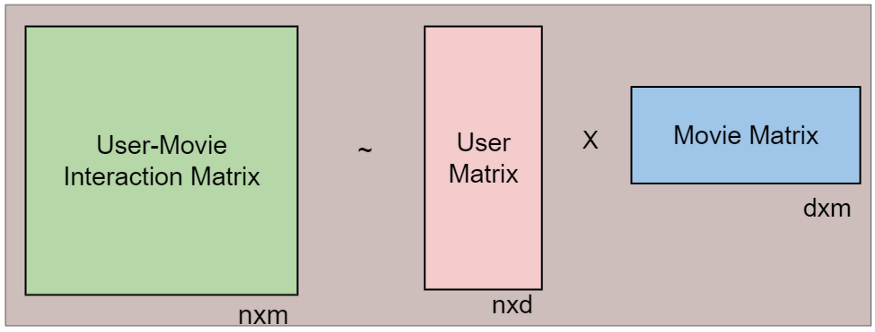

4. To implement matrix factorization, we use a simple Python library named Surprise, which is for building and testing recommender systems. The data frame is converted into a train set, a format of data set to be accepted by the Surprise library.